# Characterizing Family Structure, Stress, and Trauma
Tests used: ACE, ABQ, NLES, CCSC 
## Adverse Childhood Events (ACE) Test
- ACE Score: greater score means they faced more adversity

## Alabama Parenting Questionnaire (ABQ) Self Report
- Questionnaire measure parenting over variety of questions, scores in following:
  - Involvement (Mom and Dad)
  - Positive Parenting
  - Poor Monitoring
  - Inconsistent Discpline
  - Corporal Punishment
  - Other Discpline Practices
- Higher scores indicate increased likeliness of behavior occuring

## Negative Live Events Scale (NLES)
- used: https://www.jstor.org/stable/1131291?seq=4#metadata_info_tab_contents
- See if a child has expereinced a set of stress inducing events, sum the number of events, and level of stress caused
- Feature: Averaged upset level (total upset/num events)
- Feature: Total upset level
- Feature: Number of bad events

## Childrens Coping Strategies Checklist (CCSC)
- used https://www.jstor.org/stable/1131291?seq=4#metadata_info_tab_contents
- There are multiple categories that measure how often a child uses a problem solving method?
- Not using this right now

In [73]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import pca
from mpl_toolkits.mplot3d import Axes3D
from sklearn.mixture import GaussianMixture

# ACE Test vs NLES 

In [66]:
#import ACE
fileloc = '~/Documents/Hopkins/seniorFall/neurodata/HBN_phenotypic_data/9994_ACE_20180927.csv'
ace = pd.read_csv(fileloc)

#import NLES
fileloc = '~/Documents/Hopkins/seniorFall/neurodata/HBN_phenotypic_data/9994_NLES_SR_20180927.csv'
nles = pd.read_csv(fileloc)

rawFeatures = {}
EIDList = ace['EID'][1:]

In [71]:
for eid in EIDList:
    avgUpset = nles.loc[nles['EID'] == eid]['NLES_SR_Upset_Avg'].values
    totUpset = nles.loc[nles['EID'] == eid]['NLES_SR_Upset_Total'].values
    events = nles.loc[nles['EID'] == eid]['NLES_SR_TotalEvents'].values
    aceScore = ace.loc[ace['EID'] == eid]['ACE_Score'].values
    
    if len(avgUpset) != 0 and len(aceScore) != 0 and len(label) != 0:
        rawFeatures[eid] = [float(aceScore[0]), float(avgUpset[0]), float(totUpset[0]), float(events[0])]

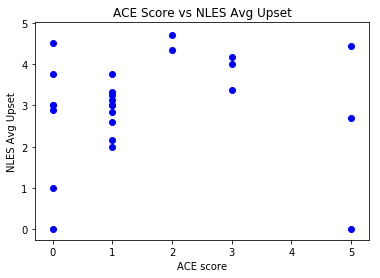

In [51]:
fig = plt.figure()
plt.xlabel('ACE score')
plt.ylabel('NLES Avg Upset')
plt.title('ACE Score vs NLES Avg Upset')
for eid in rawFeatures:
    plt.scatter(rawFeatures[eid][0], rawFeatures[eid][1], color='b')
plt.show()

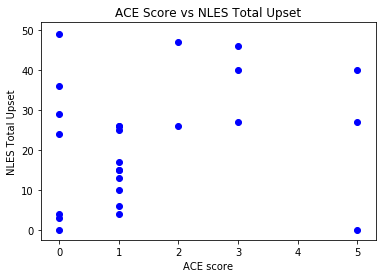

In [54]:
fig = plt.figure()
plt.xlabel('ACE score')
plt.ylabel('NLES Total Upset')
plt.title('ACE Score vs NLES Total Upset')
for eid in rawFeatures:
    plt.scatter(rawFeatures[eid][0], rawFeatures[eid][2], color='b')
plt.show()

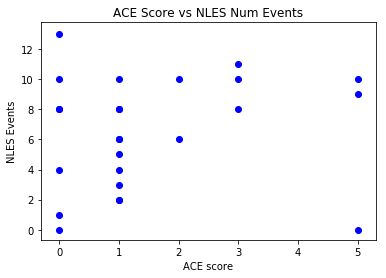

In [55]:
fig = plt.figure()
plt.xlabel('ACE score')
plt.ylabel('NLES Events')
plt.title('ACE Score vs NLES Num Events')
for eid in rawFeatures:
    plt.scatter(rawFeatures[eid][0], rawFeatures[eid][3], color='b')
plt.show()

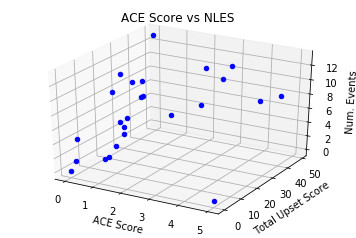

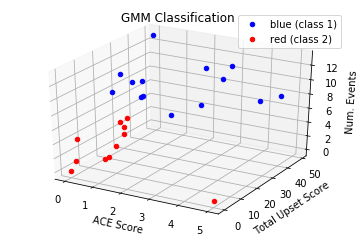

In [81]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.set_xlabel('ACE Score')
ax.set_ylabel('Total Upset Score')
ax.set_zlabel('Num. Events')
ax.set_title('ACE Score vs NLES')
data = []
for eid in rawFeatures:
    ax.scatter(rawFeatures[eid][0], rawFeatures[eid][2], rawFeatures[eid][3], color='b')
    data.append([rawFeatures[eid][0], rawFeatures[eid][2], rawFeatures[eid][3]])
plt.show()

gmm = GaussianMixture(n_components=2, covariance_type = 'full', 
                      max_iter = 100, random_state = 0)

gmm.fit(data)
labels = gmm.predict(data)

lab2col = {0: 'b', 1: 'r'}

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.set_xlabel('ACE Score')
ax.set_ylabel('Total Upset Score')
ax.set_zlabel('Num. Events')
ax.set_title('GMM Classification')
r = None
b = None
for i in range(len(labels)):
    node = ax.scatter(data[i][0], data[i][1], data[i][2], color=lab2col[labels[i]])
    if lab2col[labels[i]] == 'b' and b == None:
        b = node
    if lab2col[labels[i]] == 'r' and r == None:
        r = node
ax.legend((b, r), ('blue (class 1)', 'red (class 2)'))
plt.show()

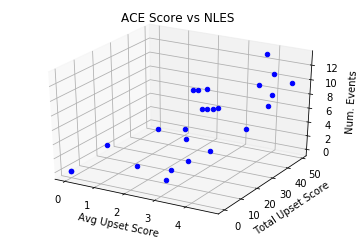

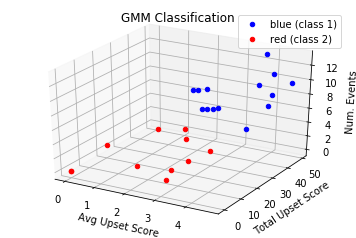

In [82]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.set_xlabel('Avg Upset Score')
ax.set_ylabel('Total Upset Score')
ax.set_zlabel('Num. Events')
ax.set_title('ACE Score vs NLES')
data = []
for eid in rawFeatures:
    ax.scatter(rawFeatures[eid][1], rawFeatures[eid][2], rawFeatures[eid][3], color='b')
    data.append([rawFeatures[eid][1], rawFeatures[eid][2], rawFeatures[eid][3]])
plt.show()

gmm = GaussianMixture(n_components=2, covariance_type = 'full', 
                      max_iter = 100, random_state = 0)

gmm.fit(data)
labels = gmm.predict(data)

lab2col = {0: 'b', 1: 'r'}

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.set_xlabel('Avg Upset Score')
ax.set_ylabel('Total Upset Score')
ax.set_zlabel('Num. Events')
ax.set_title('GMM Classification')
r = None
b = None
for i in range(len(labels)):
    node = ax.scatter(data[i][0], data[i][1], data[i][2], color=lab2col[labels[i]])
    if lab2col[labels[i]] == 'b' and b == None:
        b = node
    if lab2col[labels[i]] == 'r' and r == None:
        r = node
ax.legend((b, r), ('blue (class 1)', 'red (class 2)'))
plt.show()